# 3 player fair division

Ce notebook Jupyter a été créé à l'occasion d'un projet pour le cours de CoCoMA à l'université Sorbonne Sciences dans le cadre du M2 du master ANDROIDE.

Travail par:
* Alexis Devillard
* Elias Hanna

Rendu le 28 janvier 2019.

## 1. Description du projet

L’objectif de ce projet est de prolonger l’article “Comparing direct algorithms for two-player fair division of indivisible items – A computational study” de D. Marc Kilgour et Rudolf Vetschera. Cette article vise à évaluer 11 algorithmes d’allocations d’objets pour deux agents.

Nous avons décidé de poursuivre cet article en évaluant les adaptations de trois des algorithmes (OS, BU, TR)  dans le cas d’un partage entre 3 agents. 

### Choix:
* Objets indivisibles.
* Nombre d'agents:    3
* Allocations équilibrés (tous les agents finnissent avec le même nombre d'objets)
* Nombre d'objets :   3, 6, ...
* Algorithmes adaptés: 
    * Original Sequential
    * Bottom Up
    * Trump

**Note:** Pour chaque set de 3 agents (3 préférences) chacun des algorithmes devra renvoyé une liste d'allocations. En effet à chaque choix arbitraire (ordre des agents, ordres des trio possible, etc) une allocation différente apparait et doit être prise en compte.


## 2. Environnement utilisé

Nous avons crée deux objets:
* **Agent**:
    Contient un ordre de préférence (un ranking) pour chaque objet.
* **Allocation**:
    Contient une liste d'objets alloués pour chaque agent.

In [44]:
from agent import Agent
from agent import Allocation
from agent import AllAgents
from agent import AllAllocations
from agent import prefs_are_not_same
from OS import run_OS
from BU import run_BU
from TR import run_TR
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt
import sys

Ici une petite démonstration de l'utilisation de l'objet **Agent**.

In [8]:
nb_objets = 6
agent_1 = Agent(nb_objets, [1,2,3,4,5,6])
agent_2 = Agent(nb_objets, [5,6,1,2,3,4])
agent_3 = Agent(nb_objets, [3,4,5,6,1,2])

print("Ranks[object] : ")
agent_1.show_preferences()
agent_2.show_preferences()
agent_3.show_preferences()
print("Objects[rank] : ")
agent_1.show_ranked_obj()
agent_2.show_ranked_obj()
agent_3.show_ranked_obj()


100% processed !
Total time elapsed: 0.0 minutes and 0.05746650695800781 seconds
Number of allocs: 90
-------------------
1th alloc
[[1, 5], [0, 4], [2, 3]]
Is Borda pareto optimal:  False
Is Borda envy free:  False
-------------------
2th alloc
[[2, 3], [0, 4], [1, 5]]
Is Borda pareto optimal:  False
Is Borda envy free:  False
-------------------
3th alloc
[[3, 5], [0, 4], [1, 2]]
Is Borda pareto optimal:  False
Is Borda envy free:  False
-------------------
4th alloc
[[3, 5], [0, 2], [1, 4]]
Is Borda pareto optimal:  False
Is Borda envy free:  False
-------------------
5th alloc
[[2, 3], [1, 5], [0, 4]]
Is Borda pareto optimal:  False
Is Borda envy free:  False
-------------------
6th alloc
[[0, 3], [1, 4], [2, 5]]
Is Borda pareto optimal:  False
Is Borda envy free:  False
-------------------
7th alloc
[[0, 4], [2, 5], [1, 3]]
Is Borda pareto optimal:  False
Is Borda envy free:  False
-------------------
8th alloc
[[1, 4], [2, 5], [0, 3]]
Is Borda pareto optimal:  False
Is Borda envy

78th alloc
[[2, 3], [1, 4], [0, 5]]
Is Borda pareto optimal:  False
Is Borda envy free:  False
-------------------
79th alloc
[[3, 4], [0, 1], [2, 5]]
Is Borda pareto optimal:  False
Is Borda envy free:  False
-------------------
80th alloc
[[0, 5], [1, 4], [2, 3]]
Is Borda pareto optimal:  False
Is Borda envy free:  False
-------------------
81th alloc
[[3, 5], [1, 4], [0, 2]]
Is Borda pareto optimal:  False
Is Borda envy free:  False
-------------------
82th alloc
[[1, 5], [2, 3], [0, 4]]
Is Borda pareto optimal:  False
Is Borda envy free:  False
-------------------
83th alloc
[[2, 4], [1, 3], [0, 5]]
Is Borda pareto optimal:  False
Is Borda envy free:  False
-------------------
84th alloc
[[2, 5], [3, 4], [0, 1]]
Is Borda pareto optimal:  False
Is Borda envy free:  False
-------------------
85th alloc
[[0, 2], [4, 5], [1, 3]]
Is Borda pareto optimal:  False
Is Borda envy free:  False
-------------------
86th alloc
[[0, 2], [1, 5], [3, 4]]
Is Borda pareto optimal:  False
Is Borda env

In [ ]:
nb_objets = 6
agent_1 = Agent(nb_objets, [1,2,3,4,5,6])
agent_2 = Agent(nb_objets, [5,6,1,2,3,4])
agent_3 = Agent(nb_objets, [3,4,5,6,1,2])
agents = [agent_1, agent_2, agent_3]

allocations = AllAllocations(nb_objets, agents)
allocations.show_all_allocs()

## 3. Algorithmes
Les algoritmes implémentés prennent en argument une liste d'agents et renvoie tous une liste d'objets **allocation**.

In [3]:
allocation = run_OS([agent_1,agent_2,agent_3], nb_objets)
#allocation = run_BU([agent_1,agent_2,agent_3], nb_objets)
#allocation = run_TR([agent_1,agent_2,agent_3], nb_objets)
print("nb allocation found:" , len(allocation))
for alloc in allocation:
    alloc.simple_show()
    #print(alloc.pareto_optimal())
    print(alloc.compute_utility())
    print(alloc.borda_pareto_optimal())
    

nb allocation found: 2
[[0, 4], [3, 1], [2, 5]]
[7, 7, 9]
True
[[0, 5], [3, 1], [2, 4]]
[8, 7, 8]
True


La fonction allAgent renvoie une liste de tous les sets de 3 objets **Agent** possible.

In [11]:
nb_objets = 3
all_agents = AllAgents(nb_objets)

100% processed !
Total time elapsed: 0.0 minutes and 0.023515701293945312 seconds


On execute OS, BU et TR sur tous les sets d'agents possible. 

In [15]:
all_set = all_agents.get_all_sets()
for i in range(0, len(all_set)):
    agent_1 = all_set[i][0]
    agent_2 = all_set[i][1]
    agent_3 = all_set[i][2]
    print("-------------------")
    print(str(i+1)+"th set")
    if(prefs_are_not_same(agent_1, agent_2, agent_3)):
        try:
            allocations_OS = run_OS([agent_1,agent_2,agent_3], nb_objets)
            print("nb allocation found:" , len(allocation))
            for alloc in allocations_OS:
                alloc.simple_show()
                #print(alloc.pareto_optimal())
                print(alloc.borda_pareto_optimal())
                print(alloc.compute_utility())
        except RecursionError as error:
            print("RecursionError:"+ str(error))
    else:
        print("The prefs for all agents are the same, useless to think about it")

-------------------
1th set
The prefs for all agents are the same, useless to think about it
-------------------
2th set
nb allocation found: 6
[[0], [1], [2]]
True
[2, 1, 1]
[[1], [0], [2]]
True
[1, 2, 1]
-------------------
3th set
nb allocation found: 6
[[0], [1], [2]]
True
[2, 1, 0]
[[0], [2], [1]]
True
[2, 0, 2]
[[1], [0], [2]]
True
[1, 2, 0]
[[1], [2], [0]]
False
[1, 0, 1]
[[2], [0], [1]]
True
[0, 2, 2]
[[2], [1], [0]]
False
[0, 1, 1]
-------------------
4th set
nb allocation found: 6
[[0], [1], [2]]
True
[2, 1, 2]
[[1], [0], [2]]
True
[1, 2, 2]
-------------------
5th set
nb allocation found: 6
[[0], [1], [2]]
True
[2, 1, 1]
[[1], [0], [2]]
True
[1, 2, 1]
-------------------
6th set
nb allocation found: 6
[[0], [1], [2]]
True
[2, 1, 2]
[[1], [0], [2]]
True
[1, 2, 2]
-------------------
7th set
nb allocation found: 6
[[0], [2], [1]]
True
[2, 1, 1]
[[1], [2], [0]]
True
[1, 1, 2]
-------------------
8th set
nb allocation found: 6
[[1], [0], [2]]
True
[1, 2, 1]
[[1], [2], [0]]
True


Dans la cellule ci-dessous est fait le calcul du nombre d'allocations trouvées par chaque algorithme, ainsi que le nombre d'allocations Pareto optimales et envy free au sens du score de Borda.
Ces valeurs sont ensuites réutilisées pour produire les tableaux plus loins dans le notebook.

In [54]:
nb_rep = 10000
nb_objets_max = 6

total_allocs_OS = [0]*(nb_objets_max//3)
total_allocs_BU = [0]*(nb_objets_max//3)

total_unique_allocs_OS = [0]*(nb_objets_max//3)
total_unique_allocs_BU = [0]*(nb_objets_max//3)

total_borda_pareto_optimal_OS = [0]*(nb_objets_max//3)
total_borda_pareto_optimal_BU = [0]*(nb_objets_max//3)

total_borda_envy_free_OS = [0]*(nb_objets_max//3)
total_borda_envy_free_BU = [0]*(nb_objets_max//3)

total_time = 0

boucle = 0;

for nb_objets in range(3, nb_objets_max + 1, 3):
    for i in range(0, nb_rep):
        start = time.time()
        
        agent_1 = Agent(nb_objets)
        agent_2 = Agent(nb_objets)
        agent_3 = Agent(nb_objets)
        agents = [agent_1,agent_2,agent_3]

        if(prefs_are_not_same(agent_1, agent_2, agent_3)):
            try:
                allocations_OS = run_OS(agents, nb_objets)
                allocations_BU = run_BU(agents, nb_objets)
                
                if(len(allocations_OS) == 1):
                    total_unique_allocs_OS[nb_objets//3 - 1] +=1
                    
                if(len(allocations_BU) == 1):
                    total_unique_allocs_BU[nb_objets//3 - 1] +=1
                    
                for alloc in allocations_OS:
                    total_allocs_OS[nb_objets//3 - 1] += len(allocations_OS)
                    total_borda_pareto_optimal_OS[nb_objets//3 - 1] += len([al for al in allocations_OS if al.borda_pareto_optimal()])
                    total_borda_envy_free_OS[nb_objets//3 - 1] += len([al for al in allocations_OS if al.borda_envy_free()])
                
                for alloc in allocations_BU:
                    total_allocs_BU[nb_objets//3 - 1] += len(allocations_BU)
                    total_borda_pareto_optimal_BU[nb_objets//3 - 1] += len([al for al in allocations_BU if al.borda_pareto_optimal()])
                    total_borda_envy_free_BU[nb_objets//3 - 1] += len([al for al in allocations_BU if al.borda_envy_free()])

            except RecursionError as error:
                print("RecursionError:"+ str(error))
        else:
            pass
            #print("The prefs for all agents are the same, useless to think about it")
            
        end = time.time()
        total_time += (end - start)
        remaining = ( total_time / (boucle*nb_rep + i + 1) * (nb_objets_max//3*nb_rep - boucle*nb_rep + i) )
        clear_output(wait=True)
        print("Processing: " + str( (boucle*nb_rep + i) / (nb_objets_max//3*nb_rep) *100) + '%')
        print("Approximate remaining time: " + str(remaining//60) + " minutes and " + str(remaining%60) + " seconds")
        
    boucle += 1
# Final print
clear_output(wait=True)
print("100% processed !")
print("Total time elapsed: " + str(total_time//60) + " minutes and " + str(total_time%60) + " seconds")

100% processed !
Total time elapsed: 0.0 minutes and 53.51916193962097 seconds


[58542, 357372] [2234, 3167] [45250, 275144] [5638, 8931]
[87471, 90000] [0, 0] [72672, 47952] [15261, 2631]


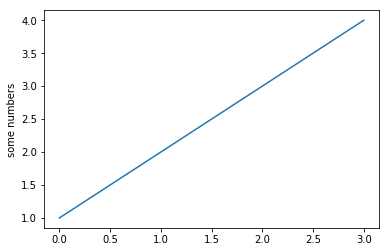

In [55]:
print(total_allocs_OS, total_unique_allocs_OS, total_borda_pareto_optimal_OS, total_borda_envy_free_OS)
print(total_allocs_BU, total_unique_allocs_BU, total_borda_pareto_optimal_BU, total_borda_envy_free_BU)

plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()